# 3D reconstruction with Lines
##### Authors: Brett Nelson and Harnoor Dhingra (NSDS, LBNL)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from sys import exit

from IPython.display import HTML

In [2]:
input_handle = pd.read_csv('S3_9/Handle.csv', names=["X", "Y", "Z"])
input_bhandle = pd.read_csv('S3_9/B Handle.csv', names=["X", "Y", "Z"])
input_palm = pd.read_csv('S3_9/Palm 1.csv', names=["X", "Y", "Z"])

<IPython.core.display.Javascript object>


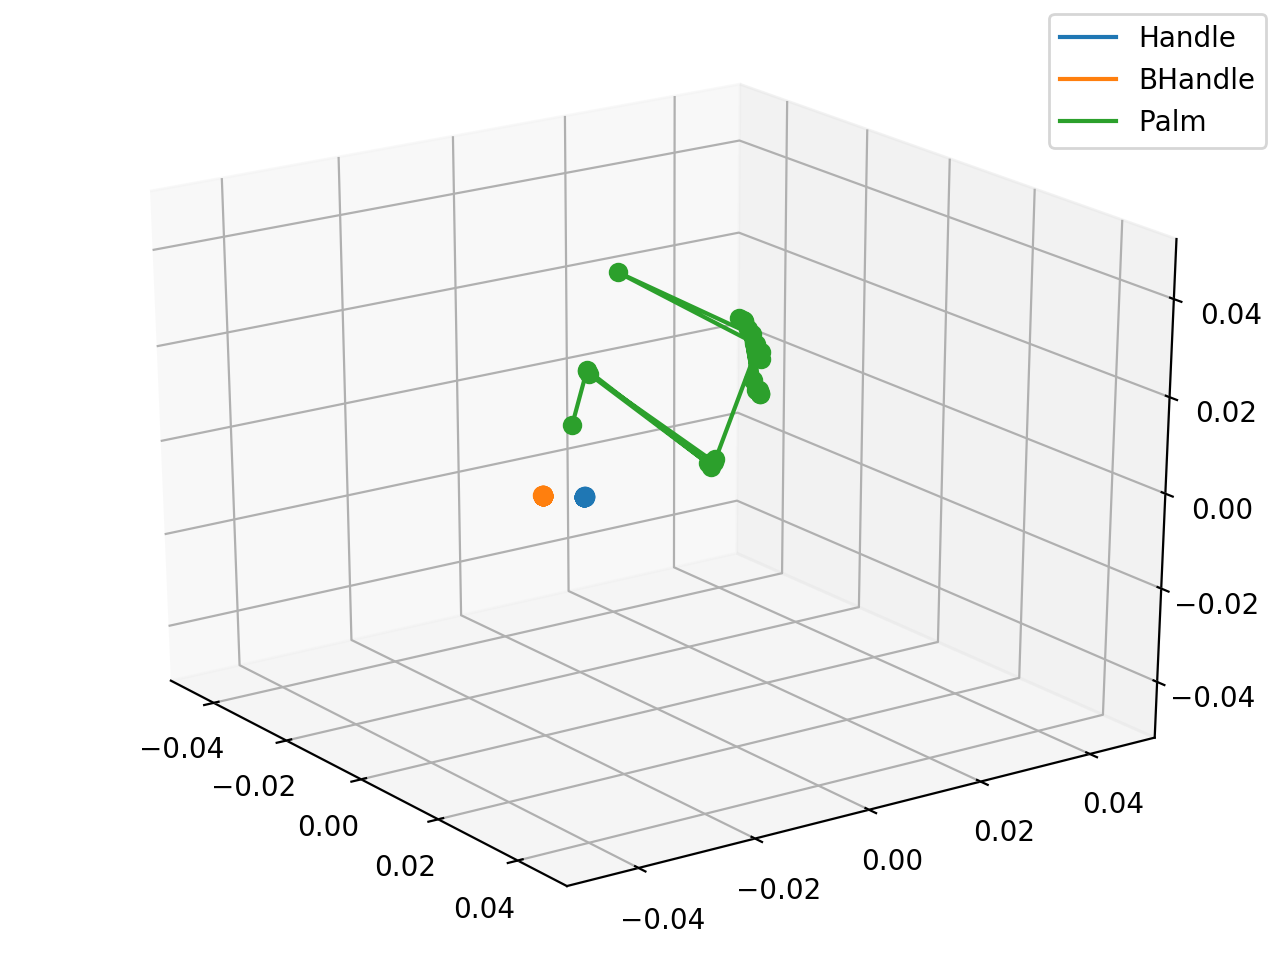

In [12]:
%matplotlib notebook
fig = plt.figure()
ax = p3.Axes3D(fig)

In [13]:
x1, y1, z1 = input_handle["X"], input_handle["Y"], input_handle["Z"]
x2, y2, z2 = input_bhandle["X"], input_bhandle["Y"], input_bhandle["Z"]
x3, y3, z3 = input_palm["X"], input_palm["Y"], input_palm["Z"]

# handle_h = np.vstack((x, y, z))
# data_handle = [handle_h]

In [14]:
data1 = np.array([[x1,y1,z1]])
lines1 = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], label = 'Handle')[0] for dat in data1]
data2 = np.array([[x2,y2,z2]])
lines2 = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], label = 'BHandle')[0] for dat in data2]
data3 = np.array([[x3,y3,z3]])
lines3 = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], label = 'Palm')[0] for dat in data3]
leg = ax.legend()

In [15]:
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, 0:num])
        line.set_3d_properties(data[2,0:num])
        line.set_marker("o")
    return lines

In [16]:
ax.set_xlim3d([-0.05, 0.05])
ax.set_ylim3d([-0.05, 0.05])
ax.set_zlim3d([-0.05, 0.05])

(-0.05, 0.05)

In [17]:
# ani1 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_handle, lines_handle),interval=400, blit=False)
line_ani1 = animation.FuncAnimation(fig, update_lines, 50, fargs=(data1, lines1),interval=500, blit=True, repeat=True)
line_ani2 = animation.FuncAnimation(fig, update_lines, 50, fargs=(data2, lines2),interval=500, blit=True, repeat=True)
line_ani3 = animation.FuncAnimation(fig, update_lines, 50, fargs=(data3, lines3),interval=500, blit=True, repeat=True)

plt.show()

In [11]:
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)
# line_ani.save('3d_with_lines_palm1.mp4', writer=writer)